## FFDI count high / extreme danger days - using percentiles

In [1]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy as cart
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path
from pathlib import Path
import scipy
import dask

%matplotlib inline

In [2]:
#Load daily FFDI data (provided by Andrew Dowdy @ BoM)
ds = xr.open_mfdataset('/g/data/v45/du2523/FFDI_daily_AndrewDowdy/FFDI/1950-2016/*.nc',
                       combine = 'nested',concat_dim='time')
ds

<xarray.Dataset>
Dimensions:  (time: 24472, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2016-12-31
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(365, 691, 886), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [3]:
#FFDI = ds.FFDI
#subset to November to February month
ds_NDJF= ds.isel(time=ds.time.dt.month.isin([1, 2, 11,12]))
#slice to seasons
ds_NDJF = ds_NDJF.sel(time = slice('1950-11-01','2016-02-29'))
ds_NDJF

<xarray.Dataset>
Dimensions:  (time: 7937, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1950-11-01 1950-11-02 ... 2016-02-29
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(61, 691, 886), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [4]:
#rechunk data - this is required to calculate quantiles
ds_NDJF = ds_NDJF.chunk({'time':-1, 'lat': 'auto', 'lon': 'auto'})
ds_NDJF

<xarray.Dataset>
Dimensions:  (time: 7937, lat: 691, lon: 886)
Coordinates:
  * time     (time) datetime64[ns] 1950-11-01 1950-11-02 ... 2016-02-29
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
Data variables:
    FFDI     (time, lat, lon) float32 dask.array<chunksize=(7937, 57, 73), meta=np.ndarray>
Attributes:
    FFDI:     Based_on_gridded_analysis_of_observations_(AWAP)_Jan2022_andrew...

In [5]:
# Subset to East coast
SEA = ds_NDJF.sel(lat = slice(-45,-24),lon = slice(140,154))

In [6]:
#Calculate percentiles and mean 
Per90 = SEA.FFDI.quantile(0.9, dim = 'time')
Per75 = SEA.FFDI.quantile(0.75, dim = 'time')
avg = SEA.FFDI.mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


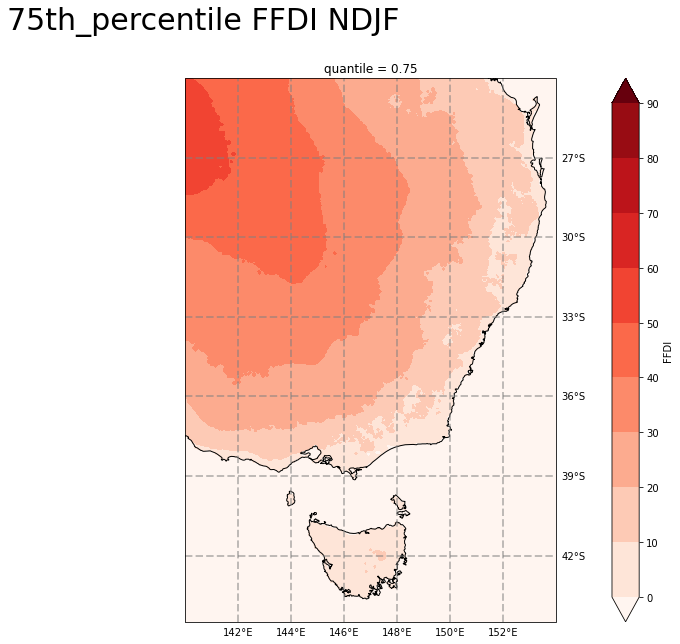

In [7]:
#if want to plot - takes some time
output = '/g/data/v45/du2523/'

fig = plt.figure(figsize = [20,10])
ax = fig.add_subplot(111, projection = ccrs.PlateCarree())

levels = np.arange(0, 100,10)
#ID = 'LDsss_FFDI_corr_sig'
var = 'FFDI'
month = 'NDJF'
ID = '75th_percentile'  #change to percentiles/average
region = 'Aus_SE'

#change input xarray
cp = Per75.plot.contourf(ax = ax,
                        levels = levels,
                        extend = 'both',
                        cmap = 'Reds',
                        transform = ccrs.PlateCarree(),
                        add_colorbar = True)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

fig.suptitle(ID + ' '+ var + ' ' + month + '',fontsize = 30)

#save figure
fig.savefig(output + var + '_'+ ID + '_' + month +'_' + region  +'.jpg')
fig.savefig(output + var + '_'+ ID + '_' + month +'_' + region  +'.pdf')

In [8]:
# Create dataset of each season
#JanYear
region = SEA
s1951 = region.sel(time = slice('1950-11','1951-02'))
s1952 = region.sel(time = slice('1951-11','1952-02'))
s1953 = region.sel(time = slice('1952-11','1953-02'))
s1954 = region.sel(time = slice('1953-11','1954-02'))
s1955 = region.sel(time = slice('1954-11','1955-02'))
s1956 = region.sel(time = slice('1955-11','1956-02'))
s1957 = region.sel(time = slice('1956-11','1957-02'))
s1958 = region.sel(time = slice('1957-11','1958-02'))
s1959 = region.sel(time = slice('1958-11','1959-02'))
s1960 = region.sel(time = slice('1959-11','1960-02'))
s1961 = region.sel(time = slice('1960-11','1961-02'))
s1962 = region.sel(time = slice('1961-11','1962-02'))
s1963 = region.sel(time = slice('1962-11','1963-02'))
s1964 = region.sel(time = slice('1963-11','1964-02'))
s1965 = region.sel(time = slice('1964-11','1965-02'))
s1966 = region.sel(time = slice('1965-11','1966-02'))
s1967 = region.sel(time = slice('1966-11','1967-02'))
s1968 = region.sel(time = slice('1967-11','1968-02'))
s1969 = region.sel(time = slice('1968-11','1969-02'))
s1970 = region.sel(time = slice('1969-11','1970-02'))
s1971 = region.sel(time = slice('1970-11','1971-02'))
s1972 = region.sel(time = slice('1971-11','1972-02'))
s1973 = region.sel(time = slice('1972-11','1973-02'))
s1974 = region.sel(time = slice('1973-11','1974-02'))
s1975 = region.sel(time = slice('1974-11','1975-02'))
s1976 = region.sel(time = slice('1975-11','1976-02'))
s1977 = region.sel(time = slice('1976-11','1977-02'))
s1978 = region.sel(time = slice('1977-11','1978-02'))
s1979 = region.sel(time = slice('1978-11','1979-02'))
s1980 = region.sel(time = slice('1979-11','1980-02'))
s1981 = region.sel(time = slice('1980-11','1981-02'))
s1982 = region.sel(time = slice('1981-11','1982-02'))
s1983 = region.sel(time = slice('1982-11','1983-02'))
s1984 = region.sel(time = slice('1983-11','1984-02'))
s1985 = region.sel(time = slice('1984-11','1985-02'))
s1986 = region.sel(time = slice('1985-11','1986-02'))
s1987 = region.sel(time = slice('1986-11','1987-02'))
s1988 = region.sel(time = slice('1987-11','1988-02'))
s1989 = region.sel(time = slice('1988-11','1989-02'))
s1990 = region.sel(time = slice('1989-11','1990-02'))
s1991 = region.sel(time = slice('1990-11','1991-02'))
s1992 = region.sel(time = slice('1991-11','1992-02'))
s1993 = region.sel(time = slice('1992-11','1993-02'))
s1994 = region.sel(time = slice('1993-11','1994-02'))
s1995 = region.sel(time = slice('1994-11','1995-02'))
s1996 = region.sel(time = slice('1995-11','1996-02'))
s1997 = region.sel(time = slice('1996-11','1997-02'))
s1998 = region.sel(time = slice('1997-11','1998-02'))
s1999 = region.sel(time = slice('1998-11','1999-02'))
s2000 = region.sel(time = slice('1999-11','2000-02'))
s2001 = region.sel(time = slice('2000-11','2001-02'))
s2002 = region.sel(time = slice('2001-11','2002-02'))
s2003 = region.sel(time = slice('2002-11','2003-02'))
s2004 = region.sel(time = slice('2003-11','2004-02'))
s2005 = region.sel(time = slice('2004-11','2005-02'))
s2006 = region.sel(time = slice('2005-11','2006-02'))
s2007 = region.sel(time = slice('2006-11','2007-02'))
s2008 = region.sel(time = slice('2007-11','2008-02'))
s2009 = region.sel(time = slice('2008-11','2009-02'))
s2010 = region.sel(time = slice('2009-11','2010-02'))
s2011 = region.sel(time = slice('2010-11','2011-02'))
s2012 = region.sel(time = slice('2011-11','2012-02'))
s2013 = region.sel(time = slice('2012-11','2013-02'))
s2014 = region.sel(time = slice('2013-11','2014-02'))
s2015 = region.sel(time = slice('2014-11','2015-02'))
s2016 = region.sel(time = slice('2015-11','2016-02'))

In [9]:
#count number of days in season > 75th Percentile
s1951_extreme = s1951.FFDI.where(s1951.FFDI >Per75).count(dim='time')
s1952_extreme = s1952.FFDI.where(s1952.FFDI >Per75).count(dim='time')
s1953_extreme = s1953.FFDI.where(s1953.FFDI >Per75).count(dim='time') 
s1954_extreme = s1954.FFDI.where(s1954.FFDI >Per75).count(dim='time') 
s1955_extreme = s1955.FFDI.where(s1955.FFDI >Per75).count(dim='time') 
s1956_extreme = s1956.FFDI.where(s1956.FFDI >Per75).count(dim='time') 
s1957_extreme = s1957.FFDI.where(s1957.FFDI >Per75).count(dim='time') 
s1958_extreme = s1958.FFDI.where(s1958.FFDI >Per75).count(dim='time') 
s1959_extreme = s1959.FFDI.where(s1959.FFDI >Per75).count(dim='time') 
s1960_extreme = s1960.FFDI.where(s1960.FFDI >Per75).count(dim='time') 
s1961_extreme = s1961.FFDI.where(s1961.FFDI >Per75).count(dim='time') 
s1962_extreme = s1962.FFDI.where(s1962.FFDI >Per75).count(dim='time') 
s1963_extreme = s1963.FFDI.where(s1963.FFDI >Per75).count(dim='time') 
s1964_extreme = s1964.FFDI.where(s1964.FFDI >Per75).count(dim='time') 
s1965_extreme = s1965.FFDI.where(s1965.FFDI >Per75).count(dim='time') 
s1966_extreme = s1966.FFDI.where(s1966.FFDI >Per75).count(dim='time') 
s1967_extreme = s1967.FFDI.where(s1967.FFDI >Per75).count(dim='time') 
s1968_extreme = s1968.FFDI.where(s1968.FFDI >Per75).count(dim='time') 
s1969_extreme = s1969.FFDI.where(s1969.FFDI >Per75).count(dim='time')
s1970_extreme = s1970.FFDI.where(s1970.FFDI >Per75).count(dim='time') 
s1971_extreme = s1971.FFDI.where(s1971.FFDI >Per75).count(dim='time') 
s1972_extreme = s1972.FFDI.where(s1972.FFDI >Per75).count(dim='time') 
s1973_extreme = s1973.FFDI.where(s1973.FFDI >Per75).count(dim='time') 
s1974_extreme = s1974.FFDI.where(s1974.FFDI >Per75).count(dim='time') 
s1975_extreme = s1975.FFDI.where(s1975.FFDI >Per75).count(dim='time') 
s1976_extreme = s1976.FFDI.where(s1976.FFDI >Per75).count(dim='time') 
s1977_extreme = s1977.FFDI.where(s1977.FFDI >Per75).count(dim='time') 
s1978_extreme = s1978.FFDI.where(s1978.FFDI >Per75).count(dim='time') 
s1979_extreme = s1979.FFDI.where(s1979.FFDI >Per75).count(dim='time') 
s1980_extreme = s1980.FFDI.where(s1980.FFDI >Per75).count(dim='time') 
s1981_extreme = s1981.FFDI.where(s1981.FFDI >Per75).count(dim='time') 
s1982_extreme = s1982.FFDI.where(s1982.FFDI >Per75).count(dim='time')
s1983_extreme = s1983.FFDI.where(s1983.FFDI >Per75).count(dim='time')
s1984_extreme = s1984.FFDI.where(s1984.FFDI >Per75).count(dim='time')
s1985_extreme = s1985.FFDI.where(s1985.FFDI >Per75).count(dim='time')
s1986_extreme = s1986.FFDI.where(s1986.FFDI >Per75).count(dim='time')
s1987_extreme = s1987.FFDI.where(s1987.FFDI >Per75).count(dim='time')
s1988_extreme = s1988.FFDI.where(s1988.FFDI >Per75).count(dim='time')
s1989_extreme = s1989.FFDI.where(s1989.FFDI >Per75).count(dim='time')
s1990_extreme = s1990.FFDI.where(s1990.FFDI >Per75).count(dim='time')
s1991_extreme = s1991.FFDI.where(s1991.FFDI >Per75).count(dim='time')
s1992_extreme = s1992.FFDI.where(s1992.FFDI >Per75).count(dim='time')
s1993_extreme = s1993.FFDI.where(s1993.FFDI >Per75).count(dim='time')
s1994_extreme = s1994.FFDI.where(s1994.FFDI >Per75).count(dim='time')
s1995_extreme = s1995.FFDI.where(s1995.FFDI >Per75).count(dim='time')
s1996_extreme = s1996.FFDI.where(s1996.FFDI >Per75).count(dim='time')
s1997_extreme = s1997.FFDI.where(s1997.FFDI >Per75).count(dim='time')
s1998_extreme = s1998.FFDI.where(s1998.FFDI >Per75).count(dim='time')
s1999_extreme = s1999.FFDI.where(s1999.FFDI >Per75).count(dim='time')
s2000_extreme = s2000.FFDI.where(s2000.FFDI >Per75).count(dim='time')
s2001_extreme = s2001.FFDI.where(s2001.FFDI >Per75).count(dim='time')
s2002_extreme = s2002.FFDI.where(s2002.FFDI >Per75).count(dim='time')
s2003_extreme = s2003.FFDI.where(s2003.FFDI >Per75).count(dim='time')
s2004_extreme = s2004.FFDI.where(s2004.FFDI >Per75).count(dim='time')
s2005_extreme = s2005.FFDI.where(s2005.FFDI >Per75).count(dim='time')
s2006_extreme = s2006.FFDI.where(s2006.FFDI >Per75).count(dim='time')
s2007_extreme = s2007.FFDI.where(s2007.FFDI >Per75).count(dim='time')
s2008_extreme = s2008.FFDI.where(s2008.FFDI >Per75).count(dim='time')
s2009_extreme = s2009.FFDI.where(s2009.FFDI >Per75).count(dim='time')
s2010_extreme = s2010.FFDI.where(s2010.FFDI >Per75).count(dim='time')
s2011_extreme = s2011.FFDI.where(s2011.FFDI >Per75).count(dim='time')
s2012_extreme = s2012.FFDI.where(s2012.FFDI >Per75).count(dim='time')
s2013_extreme = s2013.FFDI.where(s2013.FFDI >Per75).count(dim='time')
s2014_extreme = s2014.FFDI.where(s2014.FFDI >Per75).count(dim='time')
s2015_extreme = s2015.FFDI.where(s2015.FFDI >Per75).count(dim='time')
s2016_extreme = s2016.FFDI.where(s2016.FFDI >Per75).count(dim='time')


In [10]:
NDJF_high_fire_danger_75th_days_count = xr.concat([s1951_extreme,s1952_extreme,s1953_extreme,s1954_extreme,s1955_extreme,s1956_extreme,s1957_extreme,s1958_extreme,s1959_extreme,s1960_extreme,
                         s1961_extreme,s1962_extreme,s1963_extreme,s1964_extreme,s1965_extreme,s1966_extreme,s1967_extreme,s1968_extreme,s1969_extreme,s1970_extreme,
                         s1971_extreme,s1972_extreme,s1973_extreme,s1974_extreme,s1975_extreme,s1976_extreme,s1977_extreme,s1978_extreme,s1979_extreme,s1980_extreme,
                         s1981_extreme,s1982_extreme,s1983_extreme,s1984_extreme,s1985_extreme,s1986_extreme,s1987_extreme,s1988_extreme,s1989_extreme,s1990_extreme,
                         s1991_extreme,s1992_extreme,s1993_extreme,s1994_extreme,s1995_extreme,s1996_extreme,s1997_extreme,s1998_extreme,s1999_extreme,s2000_extreme,
                         s2001_extreme,s2002_extreme,s2003_extreme,s2004_extreme,s2005_extreme,s2006_extreme,s2007_extreme,s2008_extreme,s2009_extreme,s2010_extreme,
                         s2011_extreme,s2012_extreme,s2013_extreme,s2014_extreme,s2015_extreme,s2016_extreme],dim = 'time',coords = "all",combine_attrs = "identical")

NDJF_high_fire_danger_75th_days_count

<xarray.DataArray 'FFDI' (time: 66, lat: 411, lon: 281)>
dask.array<concatenate, shape=(66, 411, 281), dtype=int64, chunksize=(1, 57, 73), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -24.1 -24.05 -24.0
  * lon       (lon) float32 140.0 140.1 140.1 140.1 ... 153.9 153.9 153.9 154.0
    quantile  (time) float64 0.75 0.75 0.75 0.75 0.75 ... 0.75 0.75 0.75 0.75
Dimensions without coordinates: time

In [11]:
#count number of days in season > 90th Percentile
s1951_extreme = s1951.FFDI.where(s1951.FFDI >Per90).count(dim='time')
s1952_extreme = s1952.FFDI.where(s1952.FFDI >Per90).count(dim='time')
s1953_extreme = s1953.FFDI.where(s1953.FFDI >Per90).count(dim='time') 
s1954_extreme = s1954.FFDI.where(s1954.FFDI >Per90).count(dim='time') 
s1955_extreme = s1955.FFDI.where(s1955.FFDI >Per90).count(dim='time') 
s1956_extreme = s1956.FFDI.where(s1956.FFDI >Per90).count(dim='time') 
s1957_extreme = s1957.FFDI.where(s1957.FFDI >Per90).count(dim='time') 
s1958_extreme = s1958.FFDI.where(s1958.FFDI >Per90).count(dim='time') 
s1959_extreme = s1959.FFDI.where(s1959.FFDI >Per90).count(dim='time') 
s1960_extreme = s1960.FFDI.where(s1960.FFDI >Per90).count(dim='time') 
s1961_extreme = s1961.FFDI.where(s1961.FFDI >Per90).count(dim='time') 
s1962_extreme = s1962.FFDI.where(s1962.FFDI >Per90).count(dim='time') 
s1963_extreme = s1963.FFDI.where(s1963.FFDI >Per90).count(dim='time') 
s1964_extreme = s1964.FFDI.where(s1964.FFDI >Per90).count(dim='time') 
s1965_extreme = s1965.FFDI.where(s1965.FFDI >Per90).count(dim='time') 
s1966_extreme = s1966.FFDI.where(s1966.FFDI >Per90).count(dim='time') 
s1967_extreme = s1967.FFDI.where(s1967.FFDI >Per90).count(dim='time') 
s1968_extreme = s1968.FFDI.where(s1968.FFDI >Per90).count(dim='time') 
s1969_extreme = s1969.FFDI.where(s1969.FFDI >Per90).count(dim='time')
s1970_extreme = s1970.FFDI.where(s1970.FFDI >Per90).count(dim='time') 
s1971_extreme = s1971.FFDI.where(s1971.FFDI >Per90).count(dim='time') 
s1972_extreme = s1972.FFDI.where(s1972.FFDI >Per90).count(dim='time') 
s1973_extreme = s1973.FFDI.where(s1973.FFDI >Per90).count(dim='time') 
s1974_extreme = s1974.FFDI.where(s1974.FFDI >Per90).count(dim='time') 
s1975_extreme = s1975.FFDI.where(s1975.FFDI >Per90).count(dim='time') 
s1976_extreme = s1976.FFDI.where(s1976.FFDI >Per90).count(dim='time') 
s1977_extreme = s1977.FFDI.where(s1977.FFDI >Per90).count(dim='time') 
s1978_extreme = s1978.FFDI.where(s1978.FFDI >Per90).count(dim='time') 
s1979_extreme = s1979.FFDI.where(s1979.FFDI >Per90).count(dim='time') 
s1980_extreme = s1980.FFDI.where(s1980.FFDI >Per90).count(dim='time') 
s1981_extreme = s1981.FFDI.where(s1981.FFDI >Per90).count(dim='time') 
s1982_extreme = s1982.FFDI.where(s1982.FFDI >Per90).count(dim='time')
s1983_extreme = s1983.FFDI.where(s1983.FFDI >Per90).count(dim='time')
s1984_extreme = s1984.FFDI.where(s1984.FFDI >Per90).count(dim='time')
s1985_extreme = s1985.FFDI.where(s1985.FFDI >Per90).count(dim='time')
s1986_extreme = s1986.FFDI.where(s1986.FFDI >Per90).count(dim='time')
s1987_extreme = s1987.FFDI.where(s1987.FFDI >Per90).count(dim='time')
s1988_extreme = s1988.FFDI.where(s1988.FFDI >Per90).count(dim='time')
s1989_extreme = s1989.FFDI.where(s1989.FFDI >Per90).count(dim='time')
s1990_extreme = s1990.FFDI.where(s1990.FFDI >Per90).count(dim='time')
s1991_extreme = s1991.FFDI.where(s1991.FFDI >Per90).count(dim='time')
s1992_extreme = s1992.FFDI.where(s1992.FFDI >Per90).count(dim='time')
s1993_extreme = s1993.FFDI.where(s1993.FFDI >Per90).count(dim='time')
s1994_extreme = s1994.FFDI.where(s1994.FFDI >Per90).count(dim='time')
s1995_extreme = s1995.FFDI.where(s1995.FFDI >Per90).count(dim='time')
s1996_extreme = s1996.FFDI.where(s1996.FFDI >Per90).count(dim='time')
s1997_extreme = s1997.FFDI.where(s1997.FFDI >Per90).count(dim='time')
s1998_extreme = s1998.FFDI.where(s1998.FFDI >Per90).count(dim='time')
s1999_extreme = s1999.FFDI.where(s1999.FFDI >Per90).count(dim='time')
s2000_extreme = s2000.FFDI.where(s2000.FFDI >Per90).count(dim='time')
s2001_extreme = s2001.FFDI.where(s2001.FFDI >Per90).count(dim='time')
s2002_extreme = s2002.FFDI.where(s2002.FFDI >Per90).count(dim='time')
s2003_extreme = s2003.FFDI.where(s2003.FFDI >Per90).count(dim='time')
s2004_extreme = s2004.FFDI.where(s2004.FFDI >Per90).count(dim='time')
s2005_extreme = s2005.FFDI.where(s2005.FFDI >Per90).count(dim='time')
s2006_extreme = s2006.FFDI.where(s2006.FFDI >Per90).count(dim='time')
s2007_extreme = s2007.FFDI.where(s2007.FFDI >Per90).count(dim='time')
s2008_extreme = s2008.FFDI.where(s2008.FFDI >Per90).count(dim='time')
s2009_extreme = s2009.FFDI.where(s2009.FFDI >Per90).count(dim='time')
s2010_extreme = s2010.FFDI.where(s2010.FFDI >Per90).count(dim='time')
s2011_extreme = s2011.FFDI.where(s2011.FFDI >Per90).count(dim='time')
s2012_extreme = s2012.FFDI.where(s2012.FFDI >Per90).count(dim='time')
s2013_extreme = s2013.FFDI.where(s2013.FFDI >Per90).count(dim='time')
s2014_extreme = s2014.FFDI.where(s2014.FFDI >Per90).count(dim='time')
s2015_extreme = s2015.FFDI.where(s2015.FFDI >Per90).count(dim='time')
s2016_extreme = s2016.FFDI.where(s2016.FFDI >Per90).count(dim='time')


In [12]:
NDJF_high_fire_danger_90th_days_count = xr.concat([s1951_extreme,s1952_extreme,s1953_extreme,s1954_extreme,s1955_extreme,s1956_extreme,s1957_extreme,s1958_extreme,s1959_extreme,s1960_extreme,
                         s1961_extreme,s1962_extreme,s1963_extreme,s1964_extreme,s1965_extreme,s1966_extreme,s1967_extreme,s1968_extreme,s1969_extreme,s1970_extreme,
                         s1971_extreme,s1972_extreme,s1973_extreme,s1974_extreme,s1975_extreme,s1976_extreme,s1977_extreme,s1978_extreme,s1979_extreme,s1980_extreme,
                         s1981_extreme,s1982_extreme,s1983_extreme,s1984_extreme,s1985_extreme,s1986_extreme,s1987_extreme,s1988_extreme,s1989_extreme,s1990_extreme,
                         s1991_extreme,s1992_extreme,s1993_extreme,s1994_extreme,s1995_extreme,s1996_extreme,s1997_extreme,s1998_extreme,s1999_extreme,s2000_extreme,
                         s2001_extreme,s2002_extreme,s2003_extreme,s2004_extreme,s2005_extreme,s2006_extreme,s2007_extreme,s2008_extreme,s2009_extreme,s2010_extreme,
                         s2011_extreme,s2012_extreme,s2013_extreme,s2014_extreme,s2015_extreme,s2016_extreme],dim = 'time',coords = "all",combine_attrs = "identical")

NDJF_high_fire_danger_90th_days_count

<xarray.DataArray 'FFDI' (time: 66, lat: 411, lon: 281)>
dask.array<concatenate, shape=(66, 411, 281), dtype=int64, chunksize=(1, 57, 73), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -24.1 -24.05 -24.0
  * lon       (lon) float32 140.0 140.1 140.1 140.1 ... 153.9 153.9 153.9 154.0
    quantile  (time) float64 0.9 0.9 0.9 0.9 0.9 0.9 ... 0.9 0.9 0.9 0.9 0.9 0.9
Dimensions without coordinates: time

In [13]:
#save data
#create a time index
#time is months since Jan 1950
import pandas as pd

dates = pd.date_range("1950-12-31",freq = "A", periods = 66)
dates_np = dates.to_numpy()

#lat & lon
lats = region.lat.values
lons = region.lon.values

#data array - change for 75th or 90th
seasonal_count_90th = NDJF_high_fire_danger_90th_days_count.values
seasonal_count_75th = NDJF_high_fire_danger_75th_days_count.values

#create new dataset

FFDI_extreme_90th_count = xr.Dataset({
                    'NDJF_count_gt_90th':xr.DataArray(
                    data = seasonal_count_90th, #enter data here - array must be the same size as the time, lat, lon dims/coords
                    dims = ["time","lat","lon"],
                    coords = {'time': dates_np,
                              'lat': lats,
                              'lon': lons},
            attrs = {
            '_FillValue':-999.9,
            'units': 'number of high fire danger days above 90th percentile (NDJF)'
        }
    )
}                    
)

FFDI_extreme_75th_count = xr.Dataset({
                    'NDJF_count_gt_75th':xr.DataArray(
                    data = seasonal_count_75th, #enter data here - array must be the same size as the time, lat, lon dims/coords
                    dims = ["time","lat","lon"],
                    coords = {'time': dates_np,
                              'lat': lats,
                              'lon': lons},
            attrs = {
            '_FillValue':-999.9,
            'units': 'number of high fire danger days above 75th percentile (NDJF)'
        }
    )
}                    
)

FFDI_extreme_75th_count

<xarray.Dataset>
Dimensions:             (time: 66, lat: 411, lon: 281)
Coordinates:
  * time                (time) datetime64[ns] 1950-12-31 ... 2015-12-31
  * lat                 (lat) float32 -44.5 -44.45 -44.4 ... -24.1 -24.05 -24.0
  * lon                 (lon) float32 140.0 140.1 140.1 ... 153.9 153.9 154.0
Data variables:
    NDJF_count_gt_75th  (time, lat, lon) int64 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0

In [15]:
FFDI_extreme_90th_count.to_netcdf('/g/data/v45/du2523/FFDI_condition_counts/no_extreme_days_ab_90th_perc_NDJF_SEA.nc')
FFDI_extreme_75th_count.to_netcdf('/g/data/v45/du2523/FFDI_condition_counts/no_extreme_days_ab_75th_perc_NDJF_SEA.nc')